# 多元线性回归 
Y = βX  Y为响应变量组成的列向量；X为设计矩阵，m行n列，m表示实例个数，n表示特征个数；β为模型参数组成的列向量

## 求解参数β值

In [3]:
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[0],[13],[17.5],[18]]
print(dot(inv(dot(transpose(X),X)), dot(transpose(X),y)))

[[-5.5625    ]
 [ 1.38541667]
 [ 1.14583333]]


In [7]:
# 使用lstsq函数可以直接求解（least square method最小二乘法）
from numpy.linalg import lstsq 

X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[0],[13],[17.5],[18]]

print(lstsq(X,y,rcond=None)[0]) # 建议rcond = None

[[-5.5625    ]
 [ 1.38541667]
 [ 1.14583333]]


## 多元线性回归
和一元线性回归类似


In [14]:
# 两个解释变量（pizza的直径和配料数量） 一个响应变量（金额）
from sklearn.linear_model import LinearRegression

X = [[6,2],[8,1],[10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]
X_test = [[8,2],[9,0],[11,2],[16,2],[12,0]]
y_test = [[11],[8.5],[15],[18],[11]]

model = LinearRegression()
model.fit(X,y)

predictions = model.predict(X_test)

for i,prediction in enumerate(predictions):
    print('Predited: %s, Target: %s' % (prediction,y_test[i])) 
    print('R-squareed: %.2f' % model.score(X_test,y_test))
# 结论： 二元线性回归的R^2 比一元要高，即拟合效果更好


Predited: [10.0625], Target: [11]
R-squareed: 0.77
Predited: [10.28125], Target: [8.5]
R-squareed: 0.77
Predited: [13.09375], Target: [15]
R-squareed: 0.77
Predited: [18.14583333], Target: [18]
R-squareed: 0.77
Predited: [13.3125], Target: [11]
R-squareed: 0.77


## 多项式回归 
对非线性关系建模。一种特殊的多元线性回归————对响应变量和多项式特征项之间进行多元线性回归建模(在向量法下，多项式回归的方程和多元线性回归的方程一致)

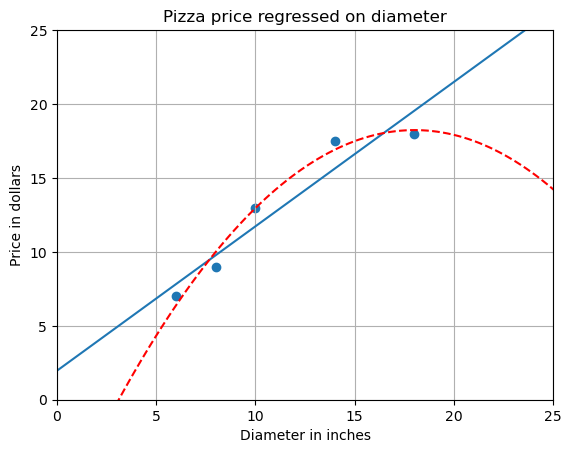

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054


In [22]:
#　对披萨的直径和金额分别进行一元线性回归和多项式回归
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # PolynomialFeatures 多项式特征

X_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]
X_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]

# 根据训练数据建立线性回归模型
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# 作图数距生成
xx = np.linspace(0, 26, 100)  # 生成100个点

# 一元线性回归
yy = regressor.predict(xx.reshape(xx.shape[0],1))  # 使用线性回归模型预测xx对应的价格yy,yy为n行1列
plt.plot(xx,yy)

# 多项式回归
quadratic_featurizer = PolynomialFeatures(degree=2) # 二次多项式特征
"""
如果原始特征是X = [x1, x2],那么degree=2的多项式回归会生成以下特征:
1(常数项)、 x1、 x2 、x1^2 、x1 * x2、 x2^2
"""
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)  # 将训练数据集的特征（直径）转换为二次多项式特征。
X_test_quadratic = quadratic_featurizer.transform(X_test)  # 将测试数据集的特征（直径）转换为二次多项式特征。
"""
使用fit_transform对训练数据集X_train进行了拟合fit和转换transform,计算出多项式特征的系数
测试阶段，不需要再次拟合，只需要将测试数据集转换为与训练数据相同的多项式特征形式
"""
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y_train)  # 根据新的特征值训练新的回归模型

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))
yy_quadratic = regressor_quadratic.predict(xx_quadratic)  # 使用新模型预测xx对应的价格yy_quadratic
plt.plot(xx, yy_quadratic, c='r', linestyle='--' )  # 绘制红色虚线表示多项式回归线
# 补充作图细节
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train,y_train) # 训练数据的样本点
plt.show()

# 打印训练和测试数据集的原始和转换后的特征矩阵，以及线性回归和多项式回归的R²值
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('simple linear regression r-squared', regressor.score(X_test,y_test))
print('Quadratic regression r-squared',regressor_quadratic.score(X_test_quadratic,y_test))


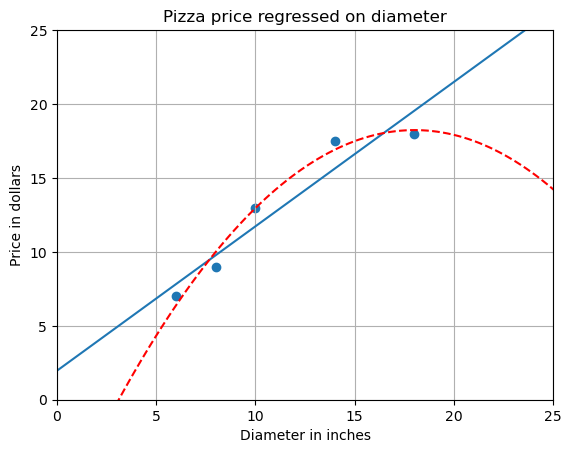

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054


In [23]:
#　对披萨的直径和金额分别进行一元线性回归和多项式回归
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # PolynomialFeatures 多项式特征

X_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]
X_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]

# 根据训练数据建立线性回归模型
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# 作图数距生成
xx = np.linspace(0, 26, 100)  # 生成100个点

# 一元线性回归
yy = regressor.predict(xx.reshape(xx.shape[0],1))  # 使用线性回归模型预测xx对应的价格yy,yy为n行1列
plt.plot(xx,yy)

# 多项式回归
quadratic_featurizer = PolynomialFeatures(degree=2) # 二次多项式特征
"""
如果原始特征是X = [x1, x2],那么degree=2的多项式回归会生成以下特征:
1(常数项)、 x1、 x2 、x1^2 、x1 * x2、 x2^2
"""
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)  # 将训练数据集的特征（直径）转换为二次多项式特征。
X_test_quadratic = quadratic_featurizer.fit_transform(X_test)  # 将测试数据集的特征（直径）转换为二次多项式特征。
"""
使用fit_transform对训练数据集X_train进行了拟合fit和转换transform,计算出多项式特征的系数
测试阶段，不需要再次拟合，只需要将测试数据集转换为与训练数据相同的多项式特征形式
"""
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y_train)  # 根据新的特征值训练新的回归模型

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))
yy_quadratic = regressor_quadratic.predict(xx_quadratic)  # 使用新模型预测xx对应的价格yy_quadratic
plt.plot(xx, yy_quadratic, c='r', linestyle='--' )  # 绘制红色虚线表示多项式回归线
# 补充作图细节
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train,y_train) # 训练数据的样本点
plt.show()

# 打印训练和测试数据集的原始和转换后的特征矩阵，以及线性回归和多项式回归的R²值
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('simple linear regression r-squared', regressor.score(X_test,y_test))
print('Quadratic regression r-squared',regressor_quadratic.score(X_test_quadratic,y_test))


## 正则化 
一个能用于防止过拟合的技巧的集合
scikit-learn类库提供了几个正则化线性回归模型：    
    1.岭回归（提克洛夫规范化）通过增加系数的L^2范数来修改RSS代价函数   
    2.LASSO（最小绝对收缩和选择算子）：通过增加系数的L^1范数，修改代价函数   
    3.弹性网正则化：是LAsso回归的L^1惩罚项和岭回归的L^2惩罚项的线性组合，即1和2都是3的特殊形式
    

## 应用线性回归

In [58]:
# 读取文件并快速了解文件
import pandas as pd
file = 'D:\Program Files\python-exercise-\《scikit-learn 机器学习》\学习代码\winequality-red.csv'
df = pd.read_csv(file, sep = ';')
df.describe()  # describe方法返回一个包含DataFrame中数值列的描述性统计信息的DataFrame。
'''
描述性统计信息包括：
非空值的数量。
mean:平均值。
std:标准差。
min:最小值。
25%:第一四分位数Q1,即数据中25%的值小于或等于这个值。
50%:中位数Q2,即数据的中间值。
75%:第三四分位数Q3,即数据中75%的值小于或等于这个值。
max:最大值。
'''

'\n描述性统计信息包括：\n非空值的数量。\nmean:平均值。\nstd:标准差。\nmin:最小值。\n25%:第一四分位数Q1,即数据中25%的值小于或等于这个值。\n50%:中位数Q2,即数据的中间值。\n75%:第三四分位数Q3,即数据中75%的值小于或等于这个值。\nmax:最大值。\n'

In [61]:
print(df.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


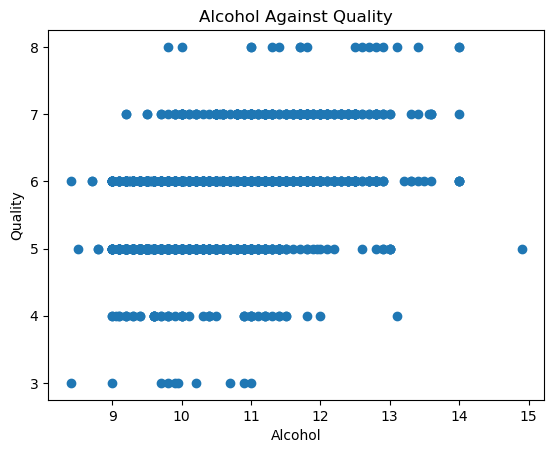

In [59]:
# 酒精含量和质量的关系散点图
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

In [66]:
# 决定哪些解释变量应该包含到模型中
# DateFrame.corr()方法计算出一个相关系数矩阵，计算数据框（DataFrame）中所有列的成对相关性

correlation_matrix = df.corr()
print(correlation_matrix)
'''
alcohol 和 quality 之间的相关性为 0.476166
volatile acidity  和  quality 之间的相关性为 -0.390558 
结论：
酒精含量和质量之间有强烈的正相关关系，挥发性酸和质量之间有强烈的负相关关系
'''

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

'\nalcohol 和 quality 之间的相关性为 0.476166\nvolatile acidity  和  quality 之间的相关性为 -0.390558 \n结论：\n酒精含量和质量之间有强烈的正相关关系，挥发性酸和质量之间有强烈的负相关关系\n'

In [68]:
# 拟合和评估模型
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

file = 'D:\Program Files\python-exercise-\《scikit-learn 机器学习》\学习代码\winequality-red.csv'
df = pd.read_csv(file, sep = ';')

# 返回一个新的数据框，包含了除最后一列外，其它所有列的所有数据
X = df[list(df.columns)[:-1]]    # list(df.columns)[:-1] 会得到一个新的列表，包含了除了最后一列之外的所有列名

y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y)

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predictions = regressor.predict(X_test)

print('R-squared: %s' % regressor.score(X_test,y_test))


R-squared: 0.3891886503302143


In [69]:
# 交叉验证
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

file = 'D:\Program Files\python-exercise-\《scikit-learn 机器学习》\学习代码\winequality-red.csv'
df = pd.read_csv(file, sep = ';')

X = df[list(df.columns)[:-1]]
y = df['quality']

regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)  # 进行 5 次训练和测试
print(scores.mean())  # 打印交叉验证得分的平均值，表示模型的平均性能指标。
print(scores)

0.2900416288421945
[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


## 梯度下降法 （Gradient Decent，GD）
优化算法。通过迭代更新参数，估计代价函数（如RSS）的最小值   
重要超参数：学习效率   
根据每次训练迭代中用于更新模型参数的训练实例的数量不同，可以分为以下三种变体：  
**1.批量梯度下降法（Batch Gradient Decent，BGD）**   
在每一次迭代中，使用所有的训练样本来计算梯度和更新模型参数。这种方法的优点是方向准确，可以直接朝向最小值的方向前进，但计算量大，速度慢，不适合大规模数据  
**2.随机梯度下降法（Stochastic Gradient Decent, SGD）**   
在每一次迭代中，随机选择一个训练样本来计算梯度和更新模型参数。这种方法的优点是计算速度快，可以快速收敛，但缺点是方向不准，容易震荡。  
**3.小批量梯度下降法（Mini-Batch Gradient Decent，MBGD）**  
上述两方法的折中   


随机梯度下降（SGD）回归器和线性回归都是用于拟合线性模型的方法，但它们在优化技术和计算效率上有所不同。

**优化技术**：线性回归通常使用解析方法（如最小二乘法）来直接求解模型参数，而SGD回归器则使用迭代的优化技术，即随机梯度下降，来逐步优化模型参数   
**计算效率**：当数据集非常大时，线性回归的计算成本可能会非常高，因为它需要在每一步都处理整个数据集。相比之下，SGD回归器每次只处理一个样本，因此对于大规模数据集，SGD回归器通常更高效    
**模型复杂性**：线性回归主要用于拟合简单的线性模型，而SGD回归器则可以用于拟合更复杂的模型，如支持向量机和逻辑回归   
**正则化**：线性回归通常不包含正则化项，而SGD回归器则可以通过添加L1或L2正则化项来防止过拟合  
**稀疏性**：当使用L1正则化时，SGD回归器可以得到稀疏模型，即模型的许多参数为零。这在处理具有大量特征的数据集时非常有用  

In [76]:
# 获取波士顿房价数据
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)  # 参数sep="\\s+"表示数据中的列是由一个或多个空格分隔的，skiprows=22表示跳过前22行，header=None表示数据没有列名。
data= np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # 将原始数据的偶数行和原始数据的奇数行的前两列水平堆叠起来，形成新的数据集。
target = raw_df.values[1::2, 2] # 将原始数据的奇数行的第三列作为目标值



In [85]:
# 用随机梯度下降（SGd）回归器来拟合
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, target) 
#　将数据标准化
X_scaler = StandardScaler()
y_scaler = StandardScaler()
# 通过reshape(-1, 1)将一维的y_train转换为二维数组，即n行1列的形式，以满足fit_transform方法的要求。
# 然后，又通过ravel方法将二维的y_train转换回一维数组，以满足cross_val_score和fit方法的要求
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1,1)).ravel() 
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1,1)).ravel()  

# 评估SGD回归器的性能（输出交叉验证的R²得分、平均R²得分以及测试集的R²得分）
regressor = SGDRegressor(loss='squared_error')  # 指定损失函数为RSS（默认也是）
scores = cross_val_score(regressor, X_train, y_train, cv=5)  # 对梯度损失函数进行交叉验证
print('Cross validation r-squared scores: %s' % scores)
print('Average cross validation r-squared score %s' %np.mean(scores))
regressor.fit(X_train,y_train)
print('Test set r-squared score %s' % regressor.score(X_test,y_test))


Cross validation r-squared scores: [0.6241708  0.70676345 0.71716244 0.64387176 0.71198492]
Average cross validation r-squared score 0.6807906737365838
Test set r-squared score 0.7989599071608473
